In [1]:
import os
import sys
sys.path.insert(1, 'utils')

In [2]:
transform_category='simplex'
evaluating_model='DirichletSymmetric'
plottype='density'
var_name='x'
var_dim=0
parameters=[{'alpha':[0.1]*10, 'N':10}]
transforms=['ALR', 'Stickbreaking']

In [8]:
from sample import sample

# transforms=['Stickbreaking', 'ALR', 'AugmentedSoftmax', 'StanStickbreaking', 'AugmentedILR', 'HypersphericalAngular', 'HypersphericalLogit', 'HypersphericalProbit', 'ProbitProduct']
for transform in transforms:
    idata=sample(transform_category='simplex',
    transform=transform,
    evaluating_model='DirichletSymmetric',
    parameters=parameters,
    output_dir='',
    auto_eval_all_params=False,
    n_iter=1000,
    n_chains=4,
    n_repeat=1,
    show_progress=True,
    resample=False,
    return_idata=True,
    inits=None)

In [10]:
import numpy as np
leapfrog = 

In [19]:
np.average(idata.sample_stats['n_steps'].sum(axis=1).values.reshape(-1, 4), axis=1)

array([13669.])

In [3]:
from rhat import calc_rhat_mixed_chains
calc_rhat_mixed_chains(path_1='stan_models/ALR_DirichletSymmetric.stan', 
                       path_2='stan_models/Stickbreaking_DirichletSymmetric.stan', 
                       variable='x', data={'alpha':[0.1]*10, 'N':10}, force_compile=False)

KeyboardInterrupt: 

Additive Log Ratio


 50%|████████████████████████████████████                                    | 1/2 [00:00<00:00,  1.85it/s]

Additive Log Ratio


100%|████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]

Stick-breaking


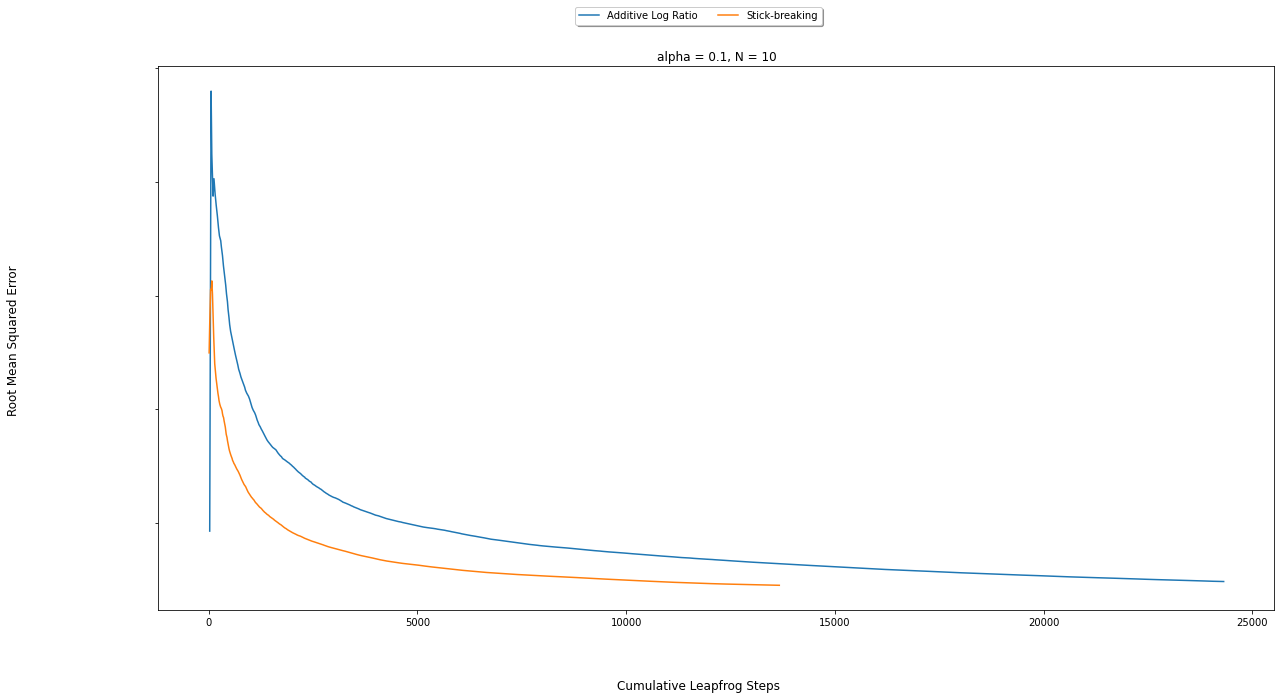

In [5]:
from rmse import get_rmse_plot
get_rmse_plot(transform_category, evaluating_model, transforms=['ALR', 'Stickbreaking'], 
              parameters=parameters, subplot_x=1, subplot_y=1, output_dir='', n_repeat=1)

10 Stickbreaking 100
 no sampler data for parametrization {'alpha': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'N': 10} and transform Stick-breaking
10 ALR 100
 no sampler data for parametrization {'alpha': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'N': 10} and transform Additive Log Ratio
10 AugmentedSoftmax 100
 no sampler data for parametrization {'alpha': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'N': 10} and transform Augmented-Softmax
10 StanStickbreaking 100
 no sampler data for parametrization {'alpha': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'N': 10} and transform Stick-breaking (in C++)
10 AugmentedILR 100
 no sampler data for parametrization {'alpha': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'N': 10} and transform Augmented-Isometric Log Ratio
10 HypersphericalAngular 100
 no sampler data for parametrization {'alpha': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1], 'N': 10} and transform Hyperspherical-Angular
10 Hypers

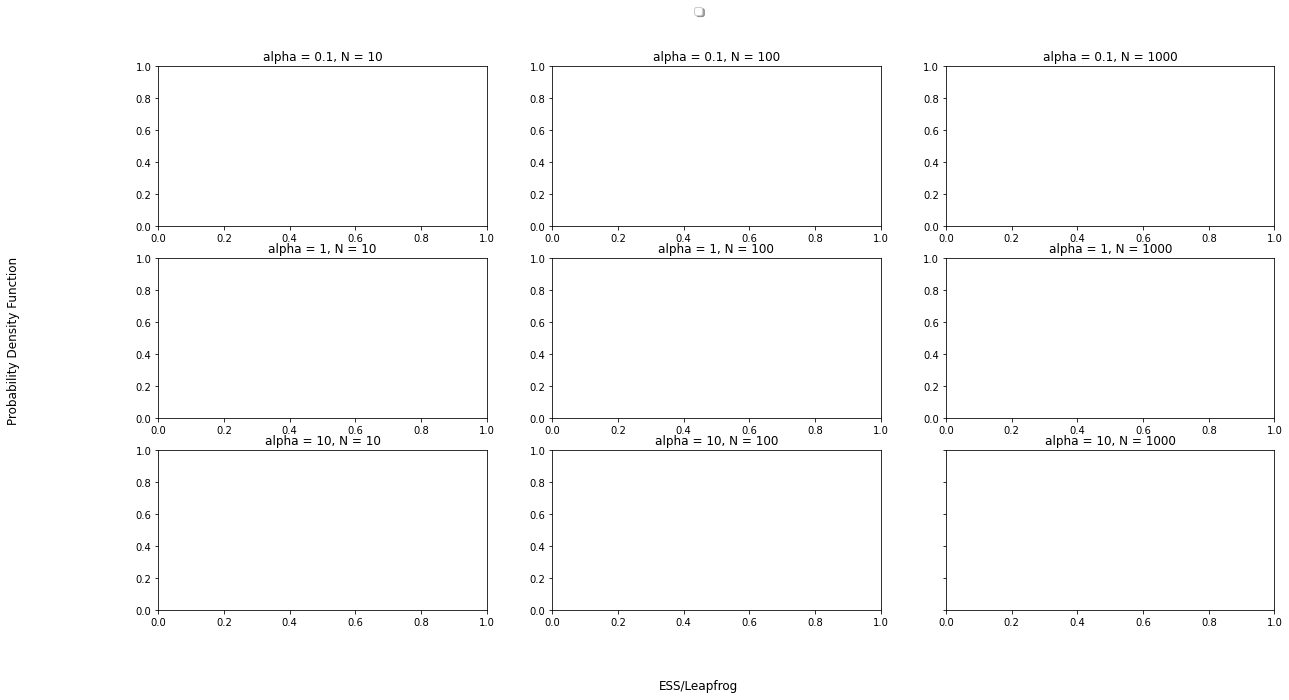

In [6]:
from ess import get_ess_plot
get_ess_plot(plottype, transform_category, evaluating_model, var_name, var_dim)

In [ ]:
from utils import list_transforms, get_true_x, transforms_labels, list_params


In [ ]:
transforms_labels('simplex')['ALR']